In [1]:
import pandas as pd

data = pd.read_csv('spambase.csv')

print(data.head())

   word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
0            0.00               0.64           0.64           0.0   
1            0.21               0.28           0.50           0.0   
2            0.06               0.00           0.71           0.0   
3            0.00               0.00           0.00           0.0   
4            0.00               0.00           0.00           0.0   

   word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
0           0.32            0.00              0.00                0.00   
1           0.14            0.28              0.21                0.07   
2           1.23            0.19              0.19                0.12   
3           0.63            0.00              0.31                0.63   
4           0.63            0.00              0.31                0.63   

   word_freq_order  word_freq_mail  ...  char_freq_;  char_freq_(  \
0             0.00            0.00  ...         0.00        0.000   
1 

In [2]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
import sagemaker 
from sagemaker import LinearLearner

sagemaker_session = sagemaker.Session()
role=sagemaker.get_execution_role()

linear = LinearLearner(role=role, instance_count=1, instance_type='ml.m4.xlarge', predictor_type='binary_classifier')

In [9]:
X_train_float32 = X_train.astype('float32')
X_test_float32 = X_test.astype('float32')
y_train_float32 = y_train.astype('float32')
y_test_float32 = y_test.astype('float32')

In [11]:
train_records = linear.record_set(X_train_float32.values, labels=y_train_float32.values) 
test_records = linear.record_set(X_test_float32.values, labels=y_test_float32.values)     
                                  

In [12]:
linear.fit(train_records)

[03/27/25 10:17:08] INFO     Same images used for training and ]8;id=394992;file:///opt/conda/lib/python3.11/site-packages/sagemaker/image_uris.py\image_uris.py]8;;\:]8;id=803394;file:///opt/conda/lib/python3.11/site-packages/sagemaker/image_uris.py#393\393]8;;\
                             inference. Defaulting to image                     
                             scope: inference.                                  
                    INFO     Ignoring unnecessary instance     ]8;id=552186;file:///opt/conda/lib/python3.11/site-packages/sagemaker/image_uris.py\image_uris.py]8;;\:]8;id=468529;file:///opt/conda/lib/python3.11/site-packages/sagemaker/image_uris.py#530\530]8;;\
                             type: None.                                        
                    INFO     Same images used for training and ]8;id=867952;file:///opt/conda/lib/python3.11/site-packages/sagemaker/image_uris.py\image_uris.py]8;;\:]8;id=868528;file:///opt/conda/lib/python3.1

In [13]:
predictor = linear.deploy(initial_instance_count = 1, instance_type='ml.m4.xlarge')

[03/27/25 10:25:13] INFO     Same images used for training and ]8;id=116609;file:///opt/conda/lib/python3.11/site-packages/sagemaker/image_uris.py\image_uris.py]8;;\:]8;id=815177;file:///opt/conda/lib/python3.11/site-packages/sagemaker/image_uris.py#393\393]8;;\
                             inference. Defaulting to image                     
                             scope: inference.                                  
                    INFO     Ignoring unnecessary instance     ]8;id=191715;file:///opt/conda/lib/python3.11/site-packages/sagemaker/image_uris.py\image_uris.py]8;;\:]8;id=962271;file:///opt/conda/lib/python3.11/site-packages/sagemaker/image_uris.py#530\530]8;;\
                             type: None.                                        
                    INFO     Creating model with name:           ]8;id=199473;file:///opt/conda/lib/python3.11/site-packages/sagemaker/session.py\session.py]8;;\:]8;id=624516;file:///opt/conda/lib/python3.11/si

In [18]:
predictions = predictor.predict(X_test_float32.values)

In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

predicted_labels = [int(pred.label['predicted_label'].float32_tensor.values[0]) for pred in predictions]


accuracy = accuracy_score(y_test_float32, predicted_labels)
precision = precision_score(y_test_float32, predicted_labels)
recall = recall_score(y_test_float32, predicted_labels)
f1 = f1_score(y_test_float32, predicted_labels)

print(f'Acuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')

Acuracy: 0.9087947882736156
Precision: 0.9157608695652174
Recall: 0.8641025641025641
F1-Score: 0.8891820580474934


In [23]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


[03/27/25 10:56:57] INFO     generated new fontManager      ]8;id=464713;file:///opt/conda/lib/python3.11/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=383842;file:///opt/conda/lib/python3.11/site-packages/matplotlib/font_manager.py#1639\1639]8;;\


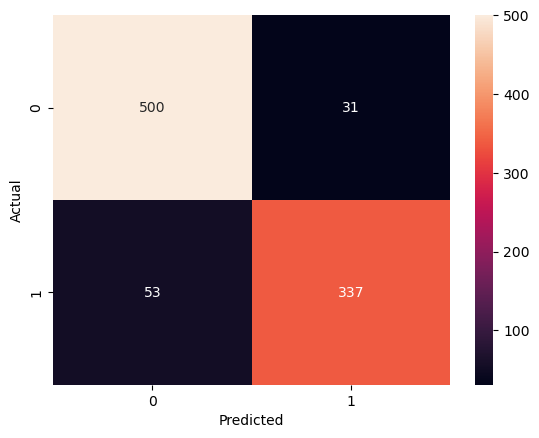

In [24]:
from sklearn.metrics import confusion_matrix 
import seaborn as sns
import matplotlib.pyplot as plt

cn = confusion_matrix(y_test_float32, predicted_labels)

sns.heatmap(cn, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()